In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [ ]:
sequence=np.array([i for i in range(1,1001)])
window_size=3
X=[]
y=[]

In [ ]:
for i in range(len(sequence)-window_size):
  X.append(sequence[i:i+window_size])
  y.append(sequence[i+window_size])

X=np.array(X)
y=np.array(y)
X=X.reshape(X.shape[0],X.shape[1],1)

In [ ]:
model=Sequential()
model.add(SimpleRNN(50,activation='relu', input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(X,y,epochs=500, verbose=0)
print("Training completed")

Training completed


In [ ]:
test_input = np.array([115, 116, 117])
test_input = test_input.reshape((1, window_size, 1))
predicted = model.predict(test_input, verbose=0)
print(predicted)

[[118.037926]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


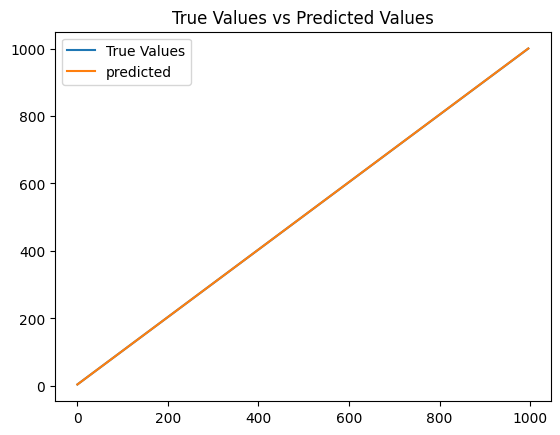

In [ ]:
predictions = model.predict(X)
plt.plot(y,label='True Values')
plt.plot(predictions, label='predicted')
plt.legend()
plt.title('True Values vs Predicted Values')
plt.show()


In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('/content/model.pkl', 'rb') as f:
    loaded_model =pickle.load(f)


In [ ]:
my_input = np.array([11, 12, 13])

# Reshape the input to match the model's expected input shape
my_input = my_input.reshape((1, window_size, 1))

# Get the prediction from the loaded model
my_prediction = loaded_model.predict(my_input)

# Print the prediction
print(f"Input: {my_input.flatten()}")
print(f"Predicted output: {my_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Input: [11 12 13]
Predicted output: 13.95848560333252


In [ ]:
import numpy as np
import gradio as gr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Data preparation
sequence = np.array([i for i in range(1, 1001)])
window_size = 3
X, y = [], []

for i in range(len(sequence) - window_size):
    X.append(sequence[i:i + window_size])
    y.append(sequence[i + window_size])

X = np.array(X)
y = np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Model building and training
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=500, verbose=0)

# Prediction function for Gradio
def predict_next_number(n1, n2, n3):
    input_seq = np.array([n1, n2, n3]).reshape((1, window_size, 1))
    prediction = model.predict(input_seq, verbose=0)
    return float(prediction[0][0])

# Gradio Interface
inputs = [gr.Number(label=f"Number {i+1}") for i in range(window_size)]
output = gr.Number(label="Predicted Next Number")

gr.Interface(fn=predict_next_number, inputs=inputs, outputs=output, title="RNN Sequence Predictor").launch()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://470b2a2013f87d1543.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
